This is the first nerual network. There are various setttings such as the model.sequentail layers, batch size, and epochs that were tweaked to achieve the best results with our clean data set.

## Installs

In [1]:
%pip install seaborn
%pip install missingno
%pip install plotly
%pip install numpy
%pip install pandas
%pip install nltk
%pip install nbformat
%pip install scikit-learn
%pip install jupyter tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imports


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

## Read Data

In [3]:
df = pd.read_csv('hospital_cleaned.csv')

## define featrues

In [4]:
features = [
    "age_group", 
    "gender",
    "type_of_admission",
    "apr_severity_of_illness_description",
    "apr_risk_of_mortality",
    "apr_medical_surgical_description",
    "emergency_department_indicator",
    "ccsr_diagnosis_description",
    "ccsr_procedure_description",
    "apr_drg_description",
    "apr_mdc_description"
]
target = "length_of_stay"
X = df[features]
y = df[target]



## One Hot Encoding

In [5]:
# (use sparse_output-False in newer scikit-learn versions)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), features)
    ],
    remainder='drop'
)
X_encoded = preprocessor.fit_transform(X)

## Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Building the Simple Dense Neural Network
- Can play around with later

In [7]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),     # input layer
    layers.Dense(64, activation='relu'), # hidden layer 1
    layers.Dense(32, activation ='relu'),# hidden layer 2
    layers.Dense(1)                      # output layer for regression
])
model.compile(
    optimizer='adam',
    loss='mse', # mean squared error
    metrics=['mae'] # mean absolute error
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        75,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,441 (302.50 KB)

 Trainable params: 77,441 (302.50 KB)

 Non-trainable params: 0 (0.00 B)

## Optional: Early stopping to prevent overfitting

In [8]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

## Train the model:

In [9]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2, # hold out 20% of train for validation
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
30454/30454 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 40.7775 - mae: 3.2486 - val_loss: 38.2950 - val_mae: 3.0858
Epoch 2/10
25482/30454 ━━━━━━━━━━━━━━━━━━━━ 3s 767us/step - loss: 37.0936 - mae: 3.0872

KeyboardInterrupt: 

## Evaluate on test set

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest MSE: {test_loss: .3f}, Test MAE: {test_mae: .3f}")


Test MSE:  38.197, Test MAE:  3.120


## Visualization

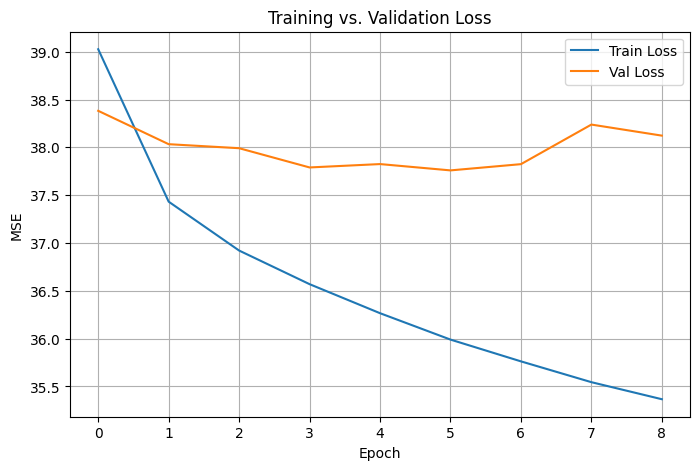

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()